# Individual Project - Credit Risk Prediction for Car Loans Portfolio
Presented by  : Paliz Mungkaladung                                                               
Date: 22/08/2021

# Accessing Data and Preprocessing

In [ ]:
# Import Libraries
%matplotlib inline 
import pandas as pd # Data Analysis
import numpy as np # Scientific Computing
import matplotlib.pyplot as plt # Plotting
import seaborn as sns # Statistical Data Visualization
import sweetviz # In-depth EDA

In [ ]:
# Just some fancy stuff to make make notebooks more presentable
import warnings
warnings.filterwarnings('ignore') # to get rid of warning messages

In [ ]:
# Import dataset file
df = pd.read_excel('AUTO_LOANS_DATA.xlsx', index_col = False)
df.head()

,REPORTING_DATE,ACCOUNT_NUMBER,CUSTOMER_ID,PROGRAM_NAME,LOAN_OPEN_DATE,EXPECTED_CLOSE_DATE,ORIGINAL_BOOKED_AMOUNT,OUTSTANDING,BUCKET,SEX,CUSTOMER_OPEN_DATE,BIRTH_DATE,PROFESSION,CAR_TYPE
0,2016-01-31,1,1,Auto Loans 50% Down Payment - Employed,2015-11-25,2020-11-03,91000.0,88223.40,0,M,2015-10-27,1986-03-24,EMPLOYEE,KIA
1,2016-01-31,2,2,Pick Up and Small Trucks,2015-12-08,2017-12-03,35000.0,33714.82,0,M,2015-11-29,1985-08-18,EMPLOYEE,CARRY
2,2016-01-31,3,3,Auto Loans 40% Down Payment - Employed,2016-01-12,2021-01-03,52500.0,52500.00,0,F,2015-12-28,1985-07-02,HOUSEWIFE,CHEVROLET
3,2016-01-31,4,4,Auto Loans 30% Down Payment - Self Employed,2015-11-23,2019-10-03,103000.0,99054.45,0,M,2015-10-21,1979-01-01,Shop Owner,MITSUBISHI
4,2016-01-31,5,5,Auto Loans 30% Down Payment - Self Employed,2015-11-23,2018-11-03,94250.0,89450.17,0,M,2015-11-02,1977-01-20,Shop Owner,SEAT


In [ ]:
# Raname colums for typing freindly
df.rename(columns=lambda x: x.lower(), inplace=True)

In [ ]:
# Check the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900860 entries, 0 to 900859
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   reporting_date          900860 non-null  datetime64[ns]
 1   account_number          900860 non-null  int64         
 2   customer_id             900860 non-null  int64         
 3   program_name            900860 non-null  object        
 4   loan_open_date          900860 non-null  datetime64[ns]
 5   expected_close_date     900860 non-null  datetime64[ns]
 6   original_booked_amount  900860 non-null  float64       
 7   outstanding             900860 non-null  float64       
 8   bucket                  900860 non-null  int64         
 9   sex                     896332 non-null  object        
 10  customer_open_date      900860 non-null  datetime64[ns]
 11  birth_date              896327 non-null  datetime64[ns]
 12  profession              895302

In [ ]:
# Display the dimension of the data frame
df.shape

(900860, 14)

In [ ]:
# Display all features
df.columns

Index(['reporting_date', 'account_number', 'customer_id', 'program_name',
       'loan_open_date', 'expected_close_date', 'original_booked_amount',
       'outstanding', 'bucket', 'sex', 'customer_open_date', 'birth_date',
       'profession', 'car_type'],
      dtype='object')

# Dataset Preprocessing for Machine Learning Model

In [ ]:
# Check for duplicate values (full row)
df.duplicated().sum()

0

In [ ]:
# Check for unique values
df.nunique(axis=0)

reporting_date                44
account_number             39597
customer_id                38396
program_name                  24
loan_open_date              2097
expected_close_date          277
original_booked_amount      3486
outstanding               823476
bucket                         8
sex                            2
customer_open_date          3094
birth_date                 12966
profession                    51
car_type                      60
dtype: int64

In [ ]:
# Check number of missing Values records
df.isnull().sum()

reporting_date                0
account_number                0
customer_id                   0
program_name                  0
loan_open_date                0
expected_close_date           0
original_booked_amount        0
outstanding                   0
bucket                        0
sex                        4528
customer_open_date            0
birth_date                 4533
profession                 5558
car_type                  11518
dtype: int64

In [ ]:
# Checking for Percentage of missing values
100*df.isnull().sum()/df.isnull().count()

reporting_date            0.000000
account_number            0.000000
customer_id               0.000000
program_name              0.000000
loan_open_date            0.000000
expected_close_date       0.000000
original_booked_amount    0.000000
outstanding               0.000000
bucket                    0.000000
sex                       0.502631
customer_open_date        0.000000
birth_date                0.503186
profession                0.616966
car_type                  1.278556
dtype: float64

In [ ]:
# Because we don't have full information of the payment history
# It's possible that some of them had or will have a bad credit record outside this interval.
# This is why I wanted to exclude rows those may not relevant. 
# Loan open date before 2016-01-01 and expected_close_dateafter 2019-09-01
# But after filtering those rows, we might lose a mssive of information. 
# Thus, I decided to keep them. 

In [ ]:
# Mask non relevant records
mask01 = (df['loan_open_date'] >= '2016-01-01') & (df['expected_close_date'] <= '2019-09-01')
filtered_df01 = df[mask01]
filtered_df01.head()
filtered_df01.value_counts()

reporting_date  account_number  customer_id  program_name                                 loan_open_date  expected_close_date  original_booked_amount  outstanding  bucket  sex  customer_open_date  birth_date  profession            car_type 
2019-08-29      36418           35405        Auto Loans 50% Down Payment - Self Employed  2018-08-13      2019-08-03           129000.0                0.00         0       M    2018-07-22          1972-07-01  Company Owner         HYUNDAI      1
2017-02-28      26886           26284        Auto Loans 50% Down Payment - Employed       2016-08-04      2019-08-03           52000.0                 45129.39     0       M    2016-07-25          1980-01-02  Manager               CHERY        1
                26911           26309        Auto Loans 50% Down Payment - Employed       2016-08-31      2019-08-03           50000.0                 42880.36     0       M    2016-07-26          1964-11-24  Instructor / Teacher  CHEVROLET    1
                26912

In [ ]:
filtered_df01.shape

(27750, 14)

In [ ]:
# Exclude overdue close date (reporting_date > expected_close_date)
df_mask = (df['reporting_date'] <= df['expected_close_date'])
df01 = df[df_mask]

In [ ]:
df01.shape

(891714, 14)

In [ ]:
# Reindex after delete records
df01.reset_index(inplace=True, drop=True)

In [ ]:
# Take a look at loan_open_date and expected_close_date, 
# We can create a column of loan periods and drop these 2 columns.
df01['loan_period'] = (df01['expected_close_date'] - df01['loan_open_date']).dt.days//365
df01.loan_period.value_counts()

4    452013
5    199837
3     85428
2     83690
6     33905
1     20738
7     13850
0      2253
Name: loan_period, dtype: int64

In [ ]:
df01.shape

(891714, 15)

In [ ]:
# Transform birth_date to age
from datetime import datetime
today = datetime.today()
df01['age'] = df01['birth_date'].apply(lambda x: (today - x).days // 365)

In [ ]:
# Check range values for age
df01.age.describe()

count    887269.000000
mean         43.562819
std          10.114028
min          23.000000
25%          35.000000
50%          42.000000
75%          51.000000
max          85.000000
Name: age, dtype: float64

In [ ]:
# Create a Category value for the column age
# cut_labels = ['1-20', '21-30', '31-40', '41-50','51-60','61-70','71-80','81-90']
# cut_bins = [0, 20, 30, 40, 50,60,70,80,90]
# df01['age_bin'] = pd.cut(df01['age'], bins=cut_bins, labels=cut_labels)
# df01[['customer_id','age','age_bin']].head()

In [ ]:
#df01.age_bin.value_counts()

In [ ]:
df01.columns

Index(['reporting_date', 'account_number', 'customer_id', 'program_name',
       'loan_open_date', 'expected_close_date', 'original_booked_amount',
       'outstanding', 'bucket', 'sex', 'customer_open_date', 'birth_date',
       'profession', 'car_type', 'loan_period', 'age'],
      dtype='object')

In [ ]:
# For better comprehension of this dataset, we filter bucket = 1 and pick some account_numbers.
filtered_df = df01.query('bucket == 1')
print(filtered_df)

       reporting_date  account_number  customer_id  \
19         2016-01-31              20           20   
20         2016-01-31              21           21   
26         2016-01-31              27           27   
56         2016-01-31              57           57   
83         2016-01-31              84           84   
...               ...             ...          ...   
891671     2019-08-29           12282        12097   
891672     2019-08-29           37437        36361   
891675     2019-08-29           26951        26348   
891685     2019-08-29           12343        12154   
891688     2019-08-29           33401        32533   

                                       program_name loan_open_date  \
19      Auto Loans 50% Down Payment - Self Employed     2015-12-07   
20      Auto Loans 30% Down Payment - Self Employed     2015-12-07   
26      Auto Loans 30% Down Payment - Self Employed     2015-12-03   
56      Auto Loans 30% Down Payment - Self Employed     2015-12-21   
8

In [ ]:
df_mask = df01['account_number']== 26951
filtered_df = df01[df_mask]
print(filtered_df)

       reporting_date  account_number  customer_id  \
172953     2016-08-31           26951        26348   
200524     2016-09-29           26951        26348   
224422     2016-10-31           26951        26348   
251602     2016-11-30           26951        26348   
277843     2016-12-29           26951        26348   
296753     2017-01-31           26951        26348   
321307     2017-02-28           26951        26348   
344397     2017-03-30           26951        26348   
359409     2017-04-30           26951        26348   
377835     2017-05-31           26951        26348   
407091     2017-06-29           26951        26348   
416169     2017-08-30           26951        26348   
453961     2017-07-31           26951        26348   
463081     2017-09-28           26951        26348   
492165     2017-10-31           26951        26348   
513266     2017-11-29           26951        26348   
525272     2017-12-31           26951        26348   
536035     2018-01-31       

In [ ]:
df_mask = df01['customer_id']== 26348
filtered_df = df01[df_mask]
print(filtered_df)

       reporting_date  account_number  customer_id  \
172953     2016-08-31           26951        26348   
200524     2016-09-29           26951        26348   
224422     2016-10-31           26951        26348   
251602     2016-11-30           26951        26348   
277843     2016-12-29           26951        26348   
296753     2017-01-31           26951        26348   
321307     2017-02-28           26951        26348   
344397     2017-03-30           26951        26348   
359409     2017-04-30           26951        26348   
377835     2017-05-31           26951        26348   
407091     2017-06-29           26951        26348   
416169     2017-08-30           26951        26348   
453961     2017-07-31           26951        26348   
463081     2017-09-28           26951        26348   
492165     2017-10-31           26951        26348   
513266     2017-11-29           26951        26348   
525272     2017-12-31           26951        26348   
536035     2018-01-31       

In [ ]:
# For instance: 
# By observing this account_number, we found that 
# 1- One customer_id may have several account_numbers.
# 2- Several records per an account_umber were kept during this period.
# 3- Bucket category 0 represents a good records. 
# 4- Number of bucket category are counted by cumulative unpaid installment. 

In [ ]:
# Bin bucket: Categolry 0 for all good records and all other bucket categories as 1
def bucket_bin (val):
    if val == 0 : return 0
    else: return 1
df01['bucket_bin']= df01['bucket'].apply(bucket_bin)

In [ ]:
df01.bucket_bin.value_counts()

0    736233
1    155481
Name: bucket_bin, dtype: int64

In [ ]:
# Now, let's work on program name. 
# The most interesting information is down payment. 
# Thus I was thinking about binning down payment as per indicated percentages, and bin all non-indicated in the same bin.
# But I am not sure about my logic because there are many differnet program_names with the same down payment. This method seems to be complicated. Finally, I decided to encode categorical values
df01.program_name.value_counts()

Auto Loans 50% Down Payment - Employed                            209002
Auto Loans 50% Down Payment - Self Employed                       189407
Auto Loans 30% Down Payment - Employed                            179123
Auto Loans 40% Down Payment - Employed                            109065
Auto Loans 40% Down Payment - Self Employed                        78100
Auto Loans 30% Down Payment - Self Employed                        55794
Pick Up and Small Trucks                                           21034
Auto Loans Payroll Clients                                         13045
Auto Loans Special Deals                                           11860
Auto Loans 20% Down Payment - Employed                              7652
Auto Loans 20% Down Payment - Self Employed                         5034
Auto Loans Corporate Guarantee                                      4445
Auto Loans Doctors - Employed                                       2223
Auto Loans 50% Down Payment No Car Prohibition - Se

In [ ]:
# Encode categorical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df01['program_name']= label_encoder.fit_transform(df01['program_name'].astype(str))

In [ ]:
df01['profession']= label_encoder.fit_transform(df01['profession'].astype(str))

In [ ]:
df01['car_type']= label_encoder.fit_transform(df01['car_type'].astype(str))

In [ ]:
df01['sex']= label_encoder.fit_transform(df01['sex'].astype(str))

In [ ]:
df01.head(10)

,reporting_date,account_number,customer_id,program_name,loan_open_date,expected_close_date,original_booked_amount,outstanding,bucket,sex,customer_open_date,birth_date,profession,car_type,loan_period,age,bucket_bin
0,2016-01-31,1,1,8,2015-11-25,2020-11-03,91000.0,88223.40,0,1,2015-10-27,1986-03-24,21,30,4,35.0,0
1,2016-01-31,2,2,23,2015-12-08,2017-12-03,35000.0,33714.82,0,1,2015-11-29,1985-08-18,21,5,1,36.0,0
2,2016-01-31,3,3,6,2016-01-12,2021-01-03,52500.0,52500.00,0,0,2015-12-28,1985-07-02,23,8,4,36.0,0
3,2016-01-31,4,4,3,2015-11-23,2019-10-03,103000.0,99054.45,0,1,2015-10-21,1979-01-01,47,39,3,42.0,0
4,2016-01-31,5,5,3,2015-11-23,2018-11-03,94250.0,89450.17,0,1,2015-11-02,1977-01-20,47,47,2,44.0,0
5,2016-01-31,6,6,8,2015-11-23,2020-11-03,54500.0,52883.86,0,1,2015-10-11,1989-05-22,21,8,4,32.0,0
6,2016-01-31,7,7,7,2016-01-28,2019-01-03,156000.0,156000.00,0,1,2016-01-18,1970-01-25,13,48,2,51.0,0
7,2016-01-31,8,8,0,2016-01-28,2019-01-03,97500.0,97500.00,0,1,2016-01-12,1988-02-29,18,45,2,33.0,0
8,2016-01-31,9,9,3,2016-01-28,2021-02-03,79500.0,79735.85,0,0,2015-02-26,1983-04-14,13,8,5,38.0,0
9,2016-01-31,10,10,2,2015-11-25,2020-10-03,88500.0,85752.30,0,1,2015-11-02,1976-04-25,32,45,4,45.0,0


In [ ]:
df01.sex.value_counts()

1    634420
0    252854
2      4440
Name: sex, dtype: int64

In [ ]:
# Exclude all datetimes and non relevant features
df01.drop(['reporting_date', 'loan_open_date', 'expected_close_date', 'customer_open_date', 'birth_date', 'bucket'], axis='columns', inplace=True)
df01.shape

(891714, 11)

In [ ]:
# Check number of missing values records again
df01.isnull().sum()

account_number               0
customer_id                  0
program_name                 0
original_booked_amount       0
outstanding                  0
sex                          0
profession                   0
car_type                     0
loan_period                  0
age                       4445
bucket_bin                   0
dtype: int64

In [ ]:
df_full = df01.fillna(0)

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891714 entries, 0 to 891713
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   account_number          891714 non-null  int64  
 1   customer_id             891714 non-null  int64  
 2   program_name            891714 non-null  int64  
 3   original_booked_amount  891714 non-null  float64
 4   outstanding             891714 non-null  float64
 5   sex                     891714 non-null  int64  
 6   profession              891714 non-null  int64  
 7   car_type                891714 non-null  int64  
 8   loan_period             891714 non-null  int64  
 9   age                     891714 non-null  float64
 10  bucket_bin              891714 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 74.8 MB


In [ ]:
df_full.shape

(891714, 11)

In [ ]:
# Export datasets to CSV files
# 0- Full dataset
df_full.to_csv('DATA_FULL', index = False)

In [ ]:
# Split full dataset into 2 datasets: 
# 1- Individuals
df_individuals = df01.loc[df01['sex'] != 2]
df_individuals.to_csv('DATA_INDIVIDUALS', index = False)

In [ ]:
# 2- Companies
df_companies = df01.loc[df01['sex'] == 2]
df_companies.to_csv('DATA_COMPANIES', index = False)

# Exploration Data Analysis

In [ ]:
report01 = sweetviz.analyze(df_full,'bucket_bin')


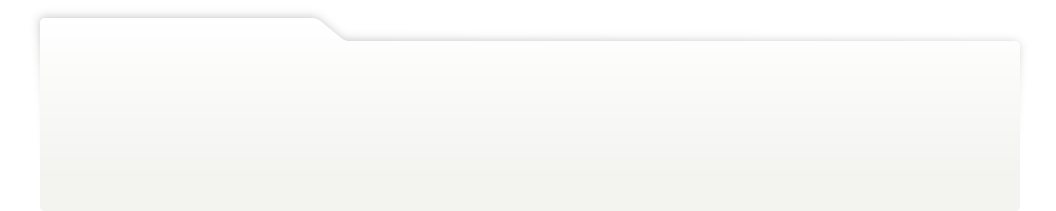
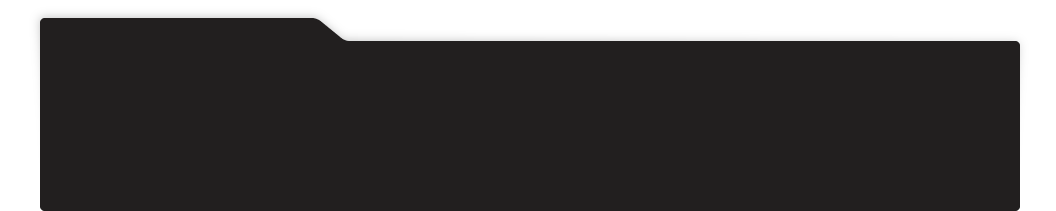
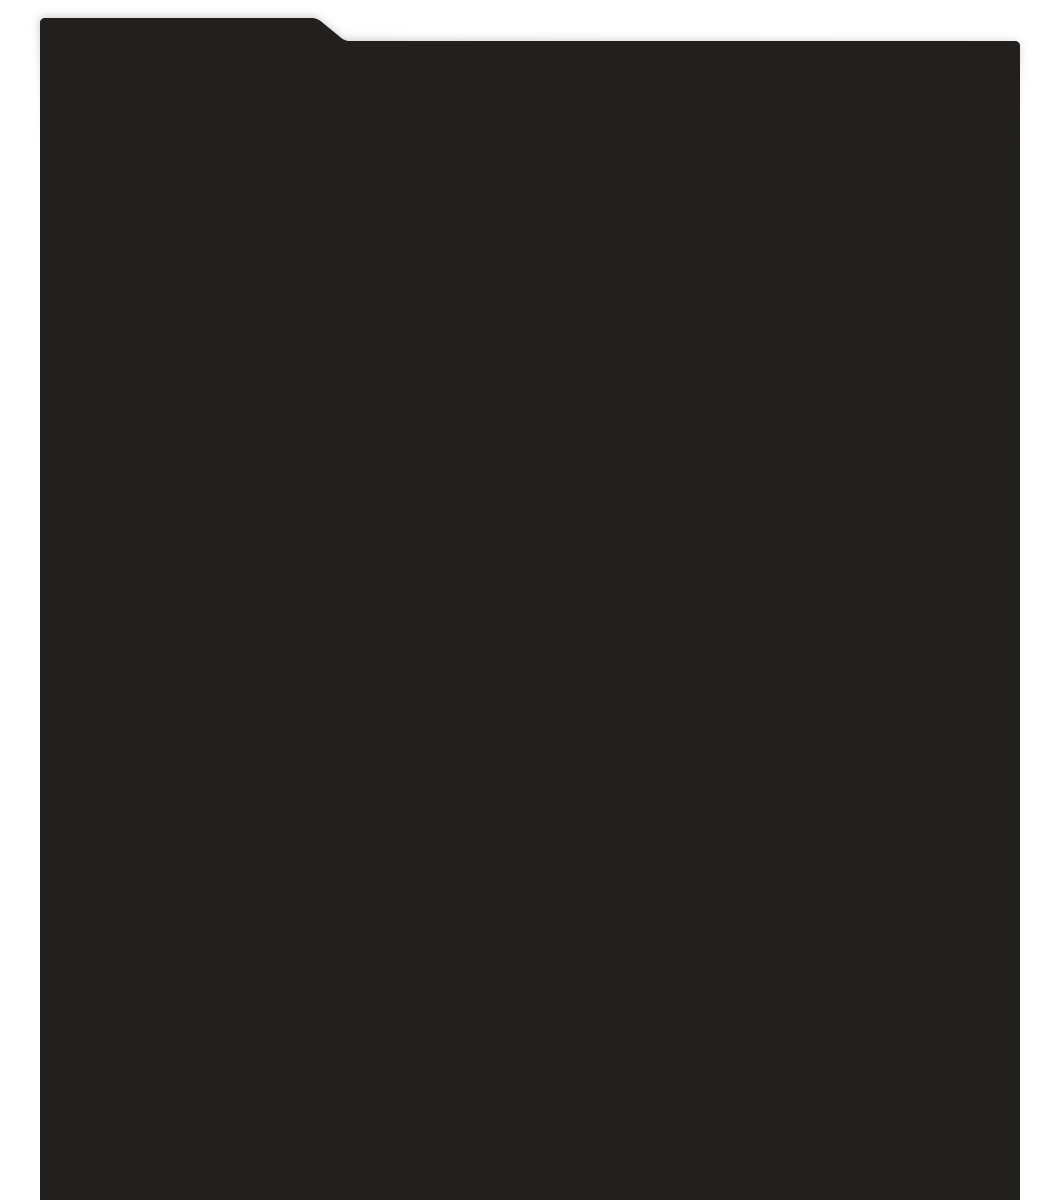
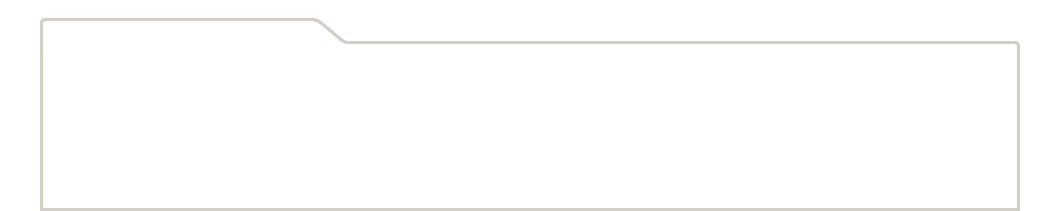
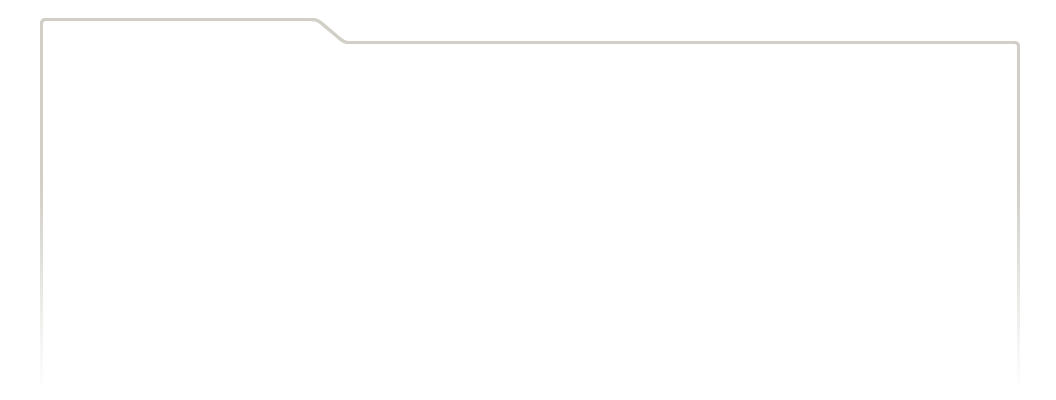
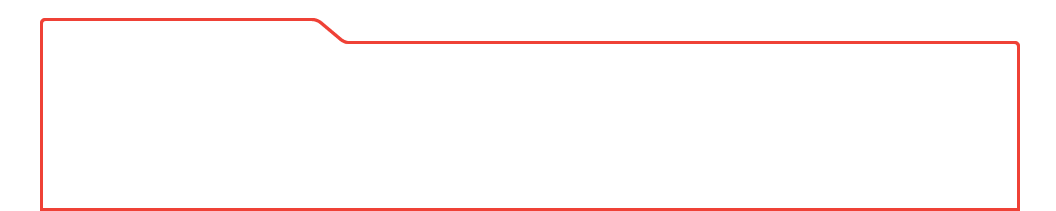
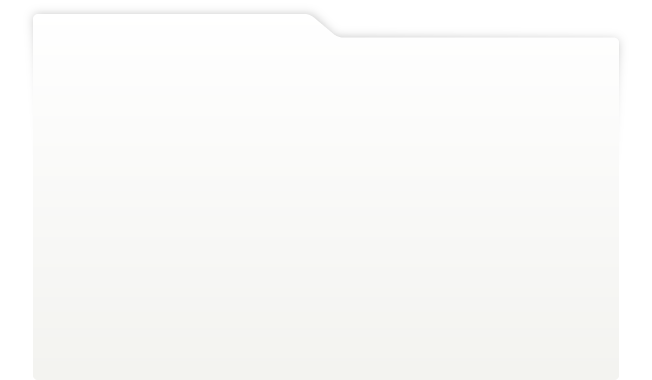
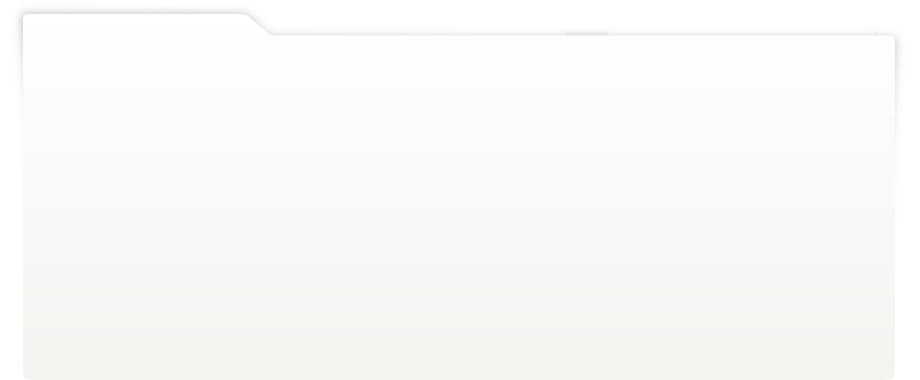
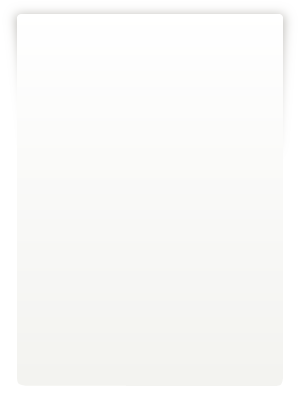
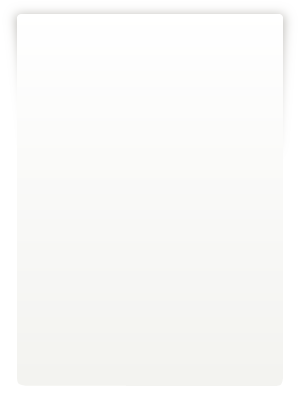
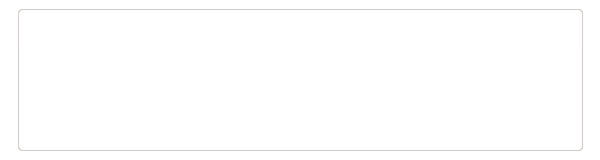
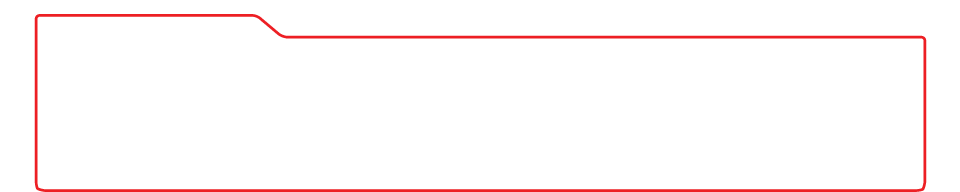
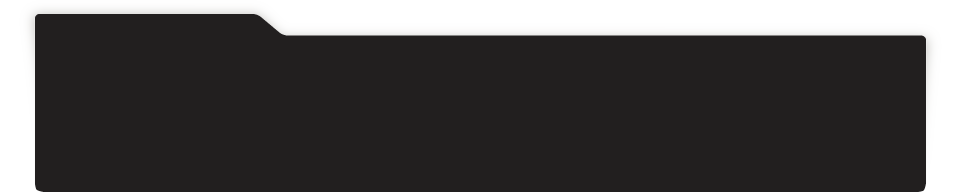
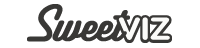
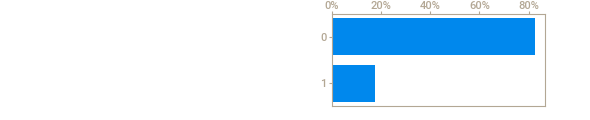
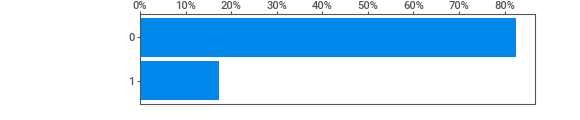
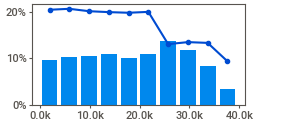
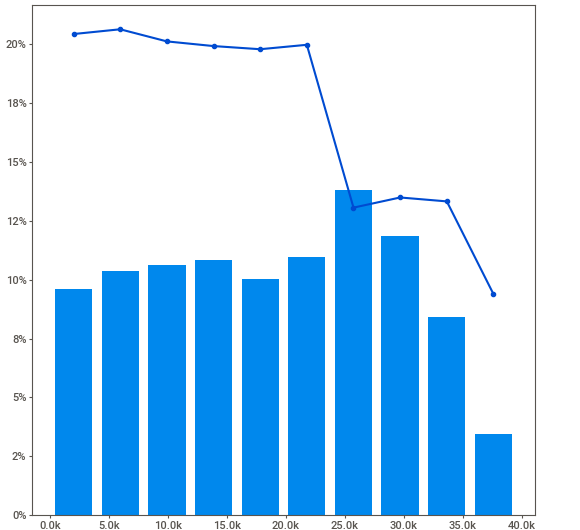
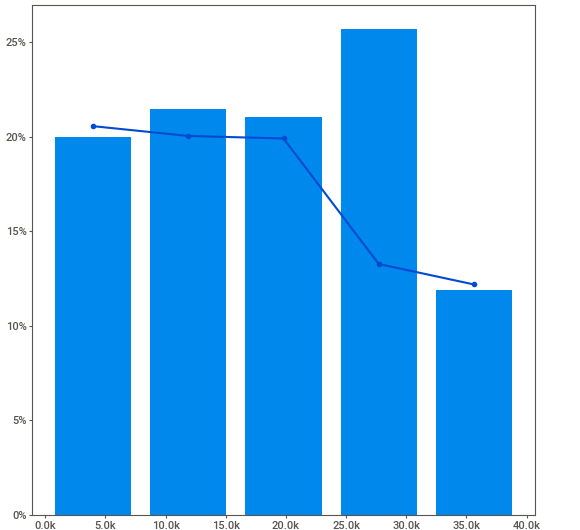
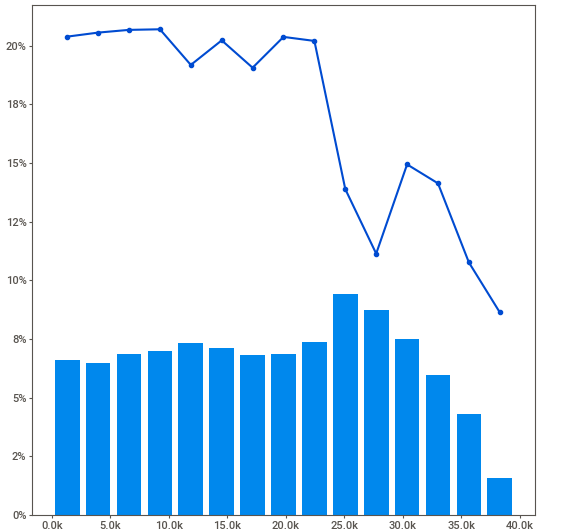
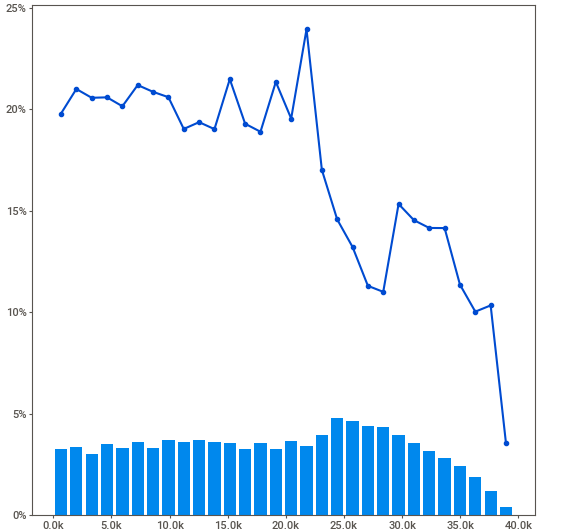
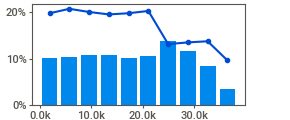
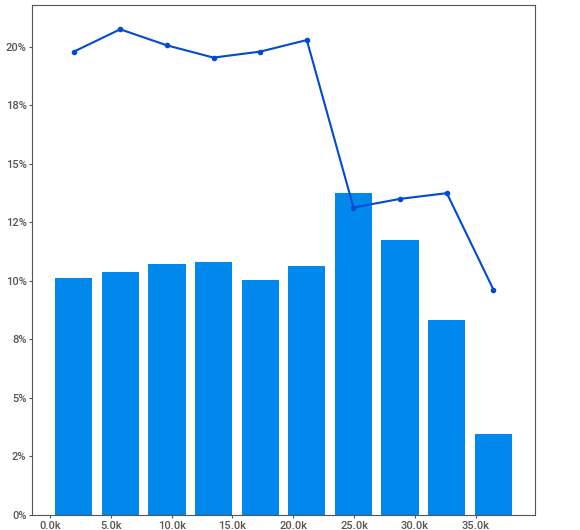
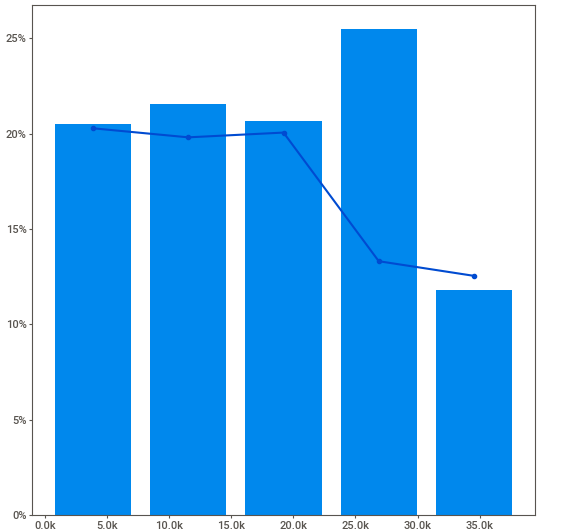
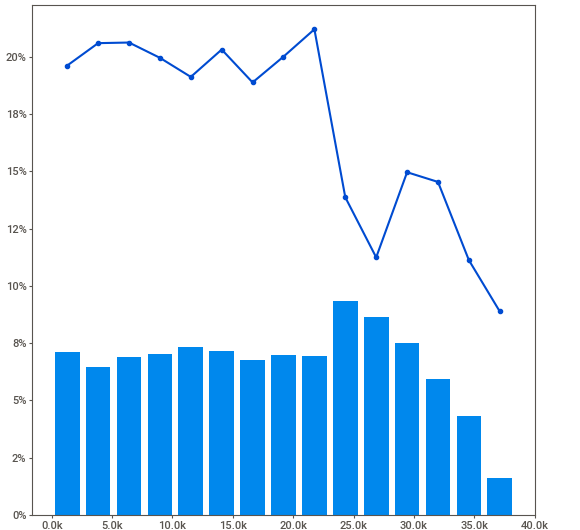
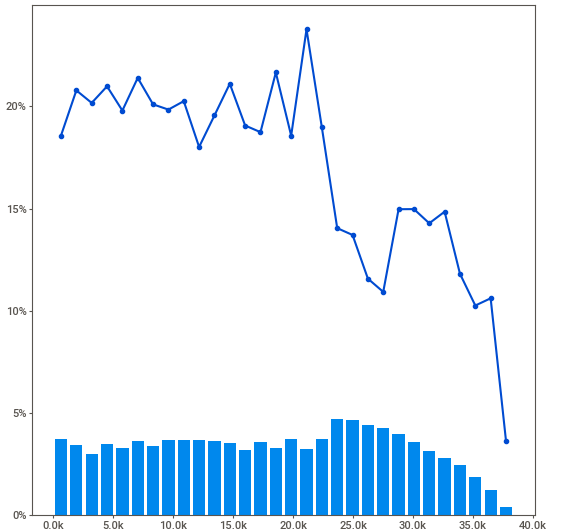
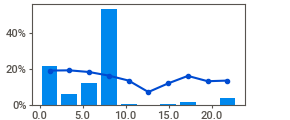
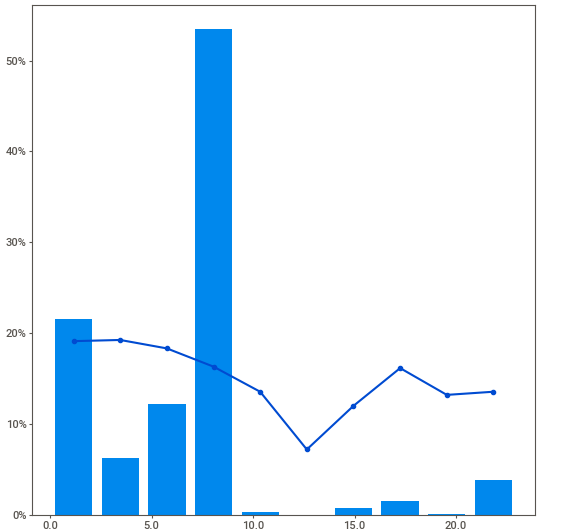
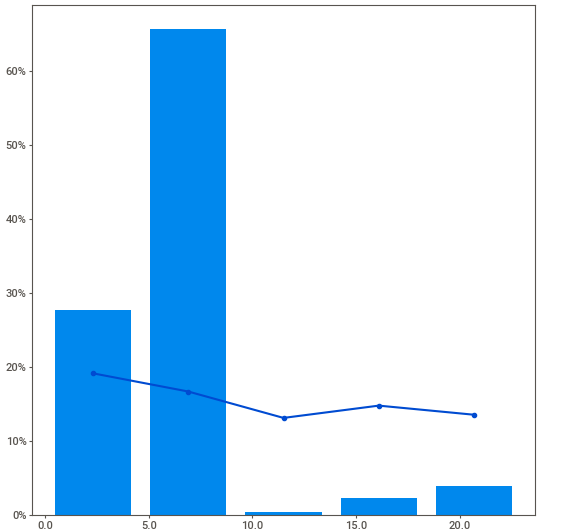
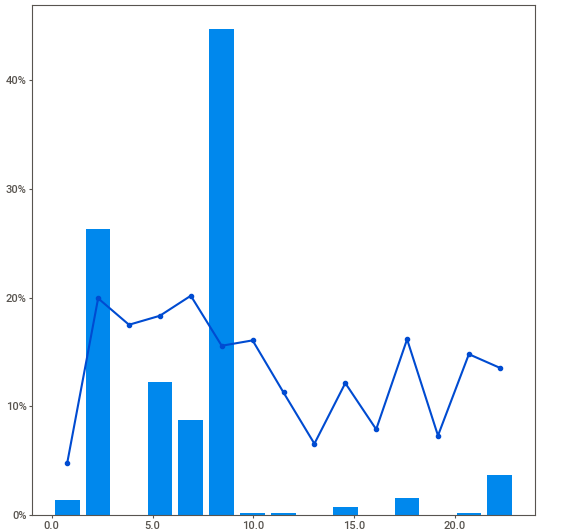
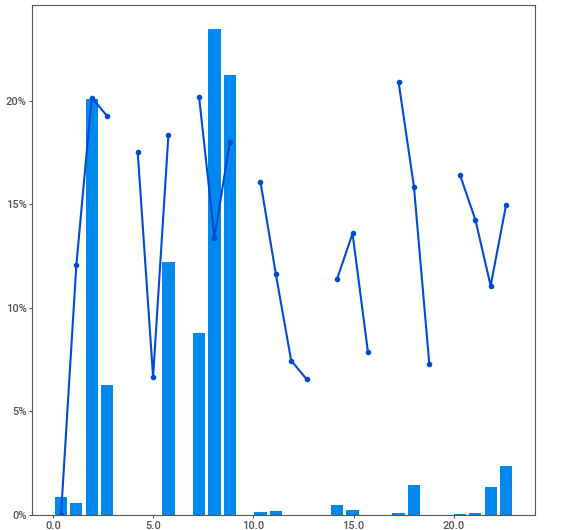
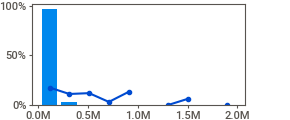
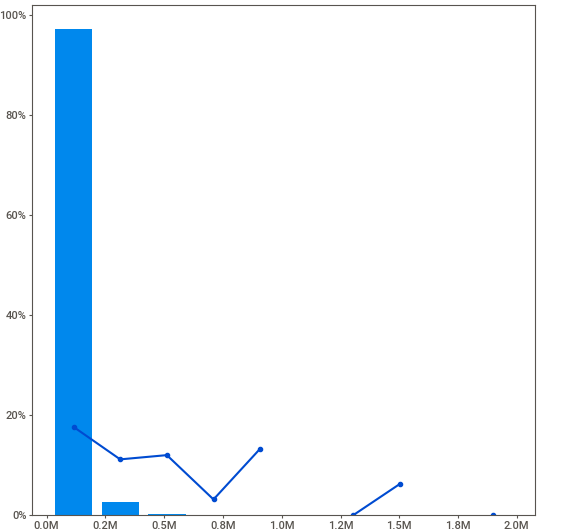
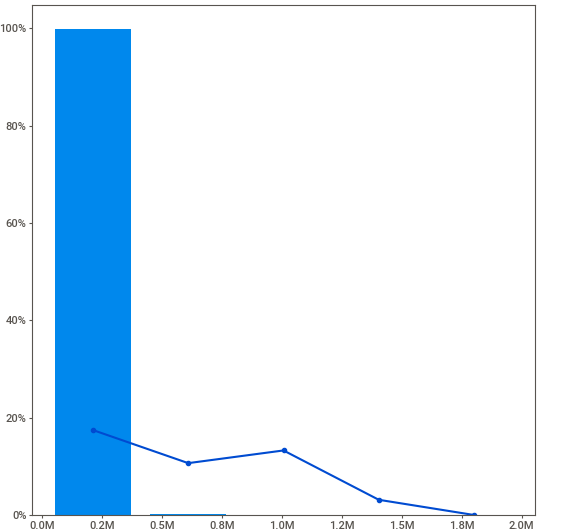
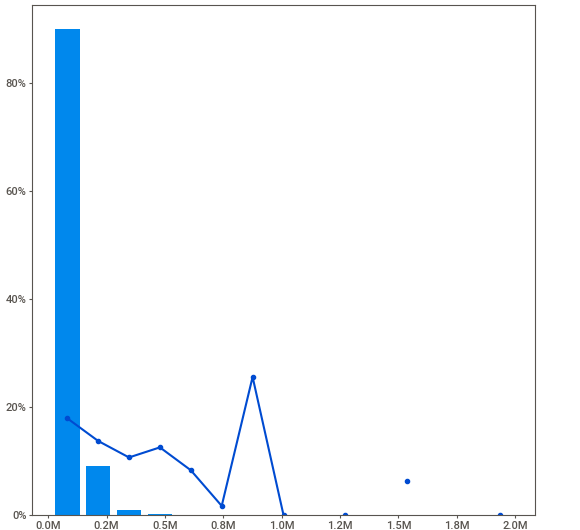
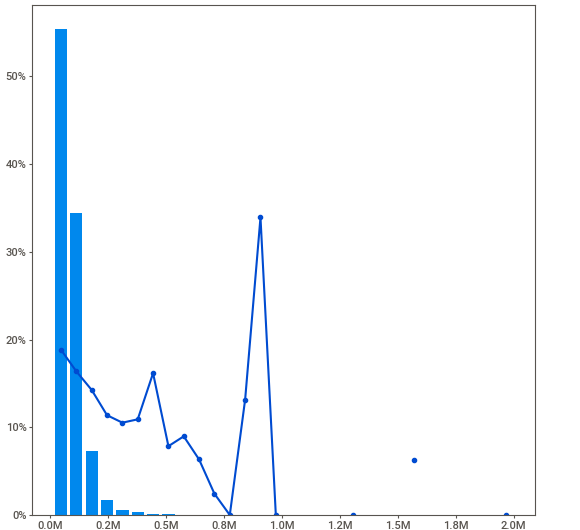
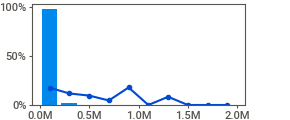
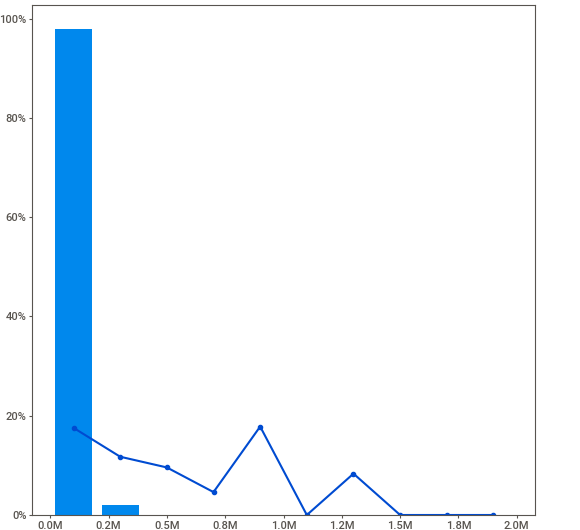
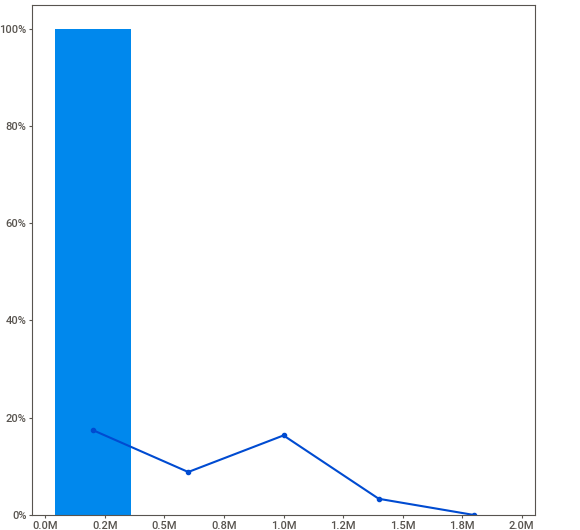
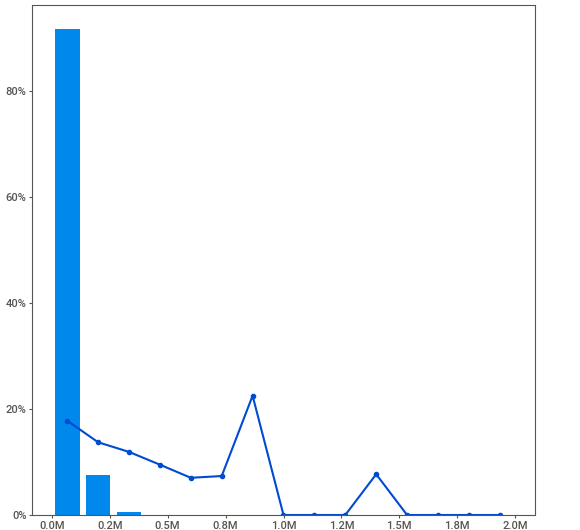
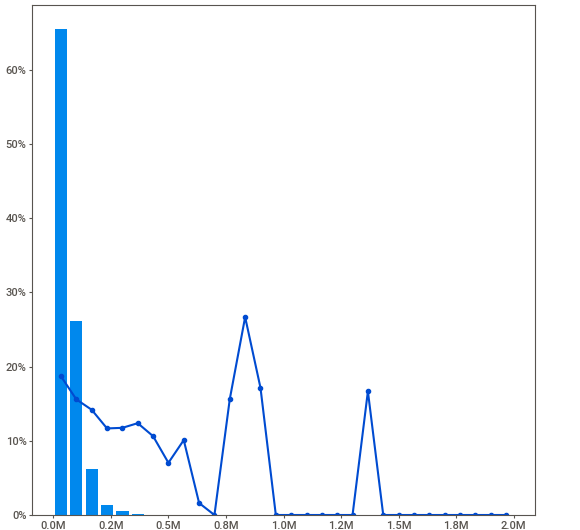
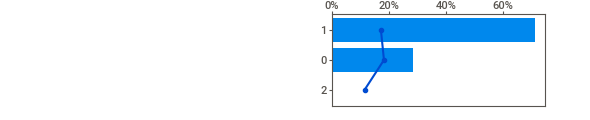
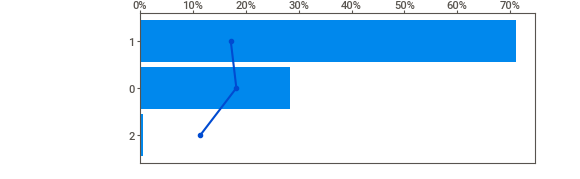
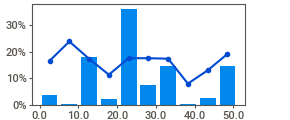
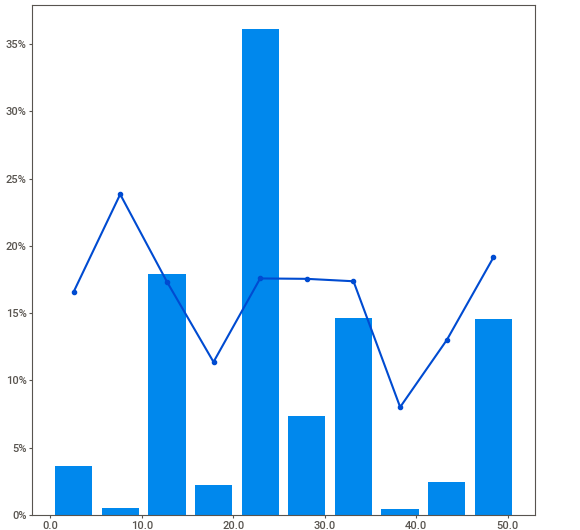
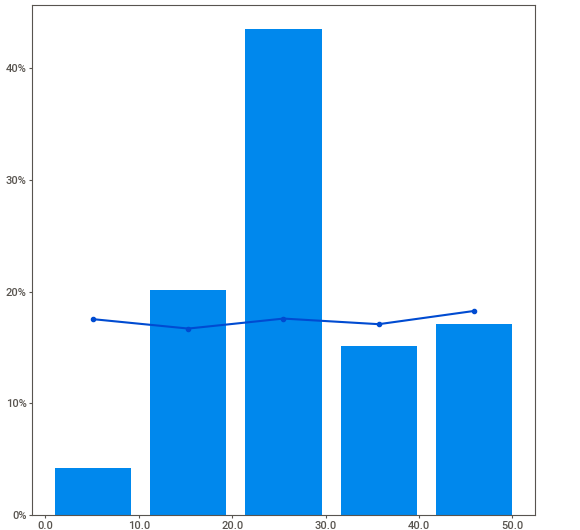
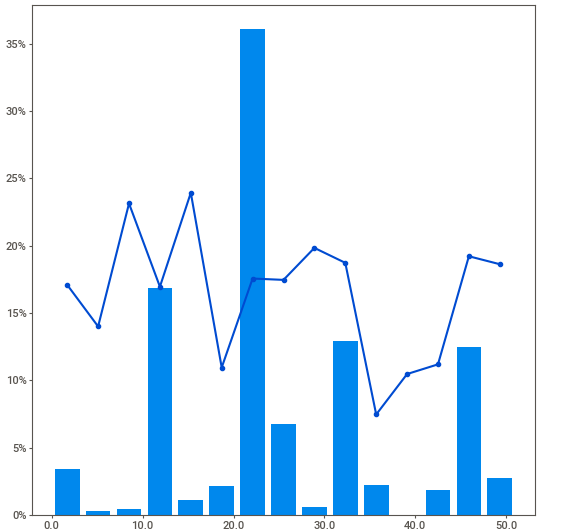
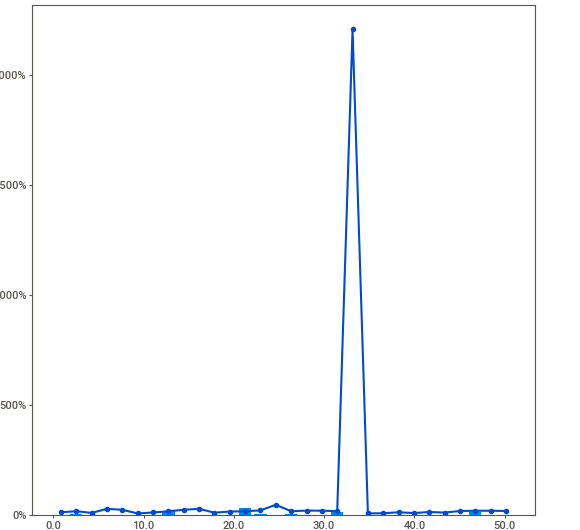
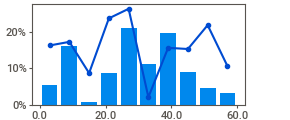
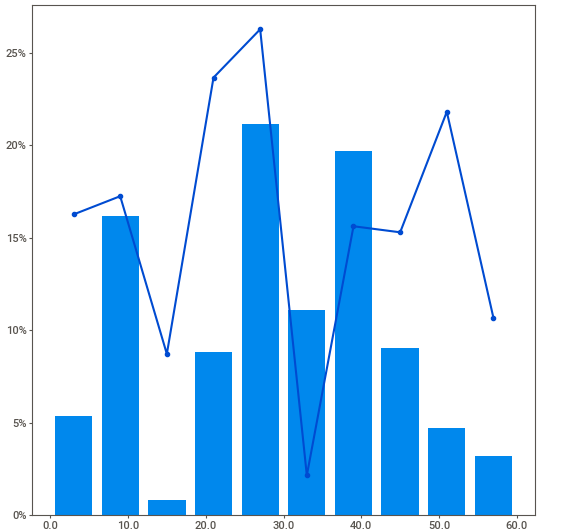
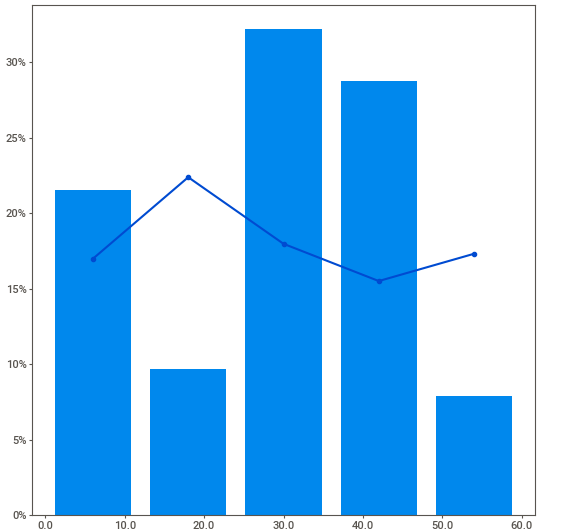
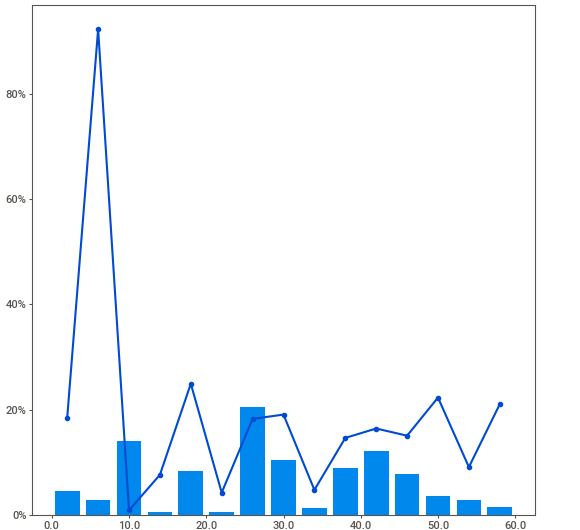
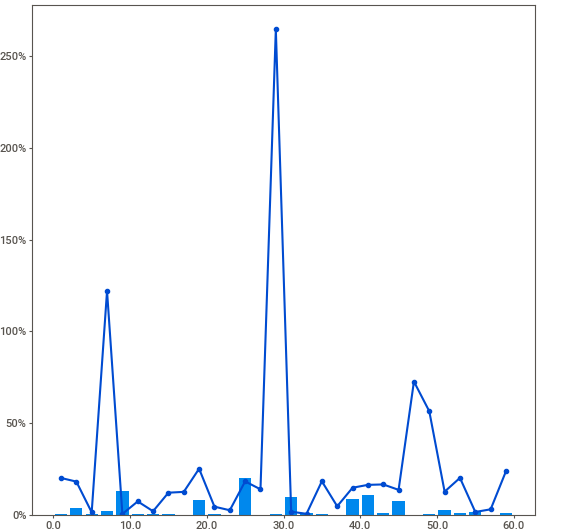
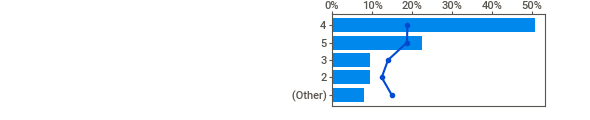
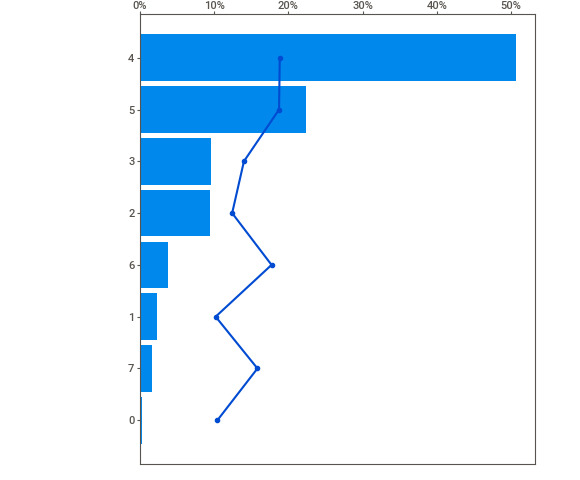
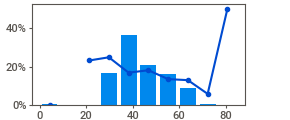
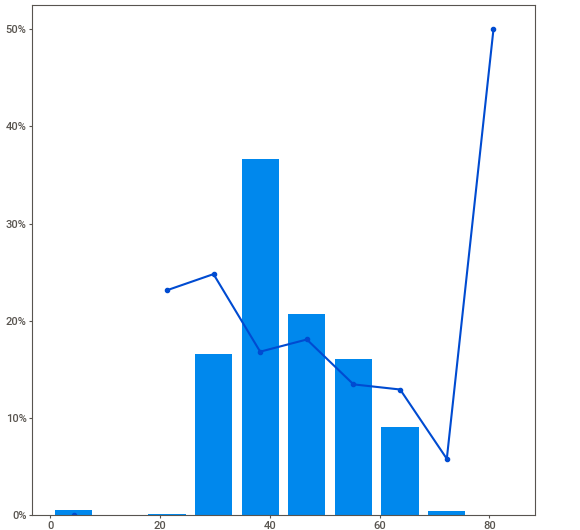
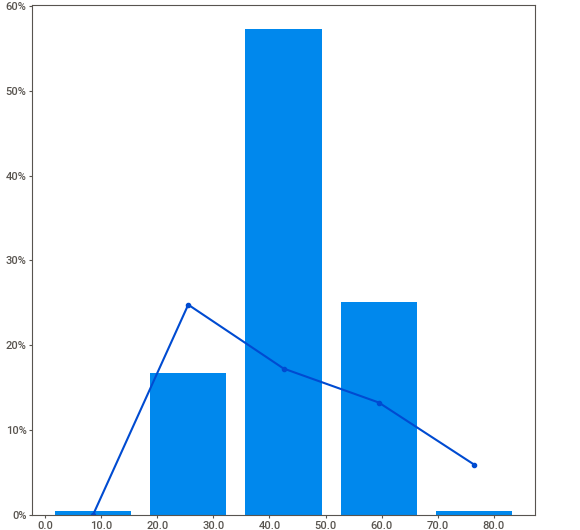
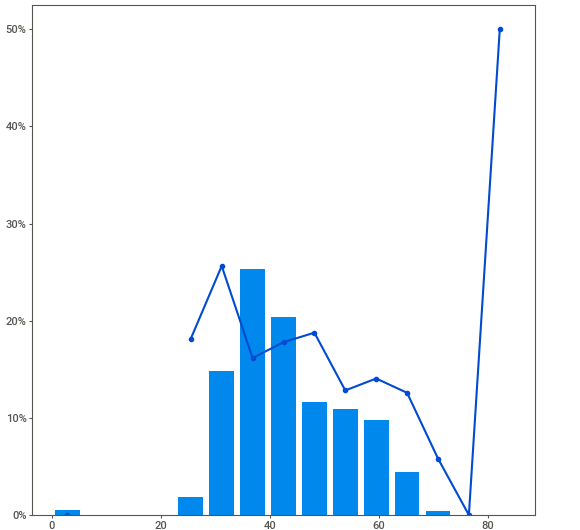
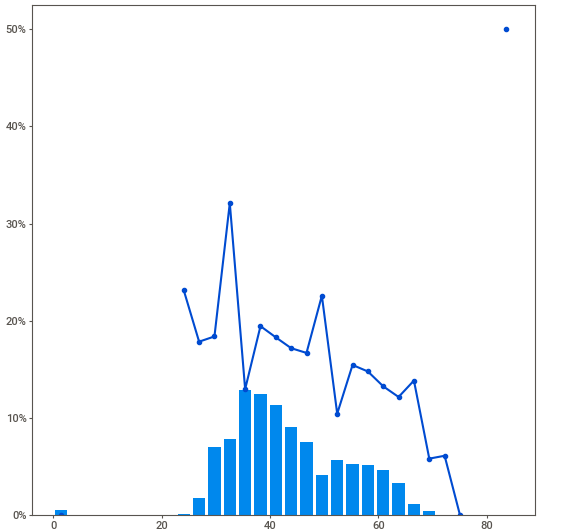
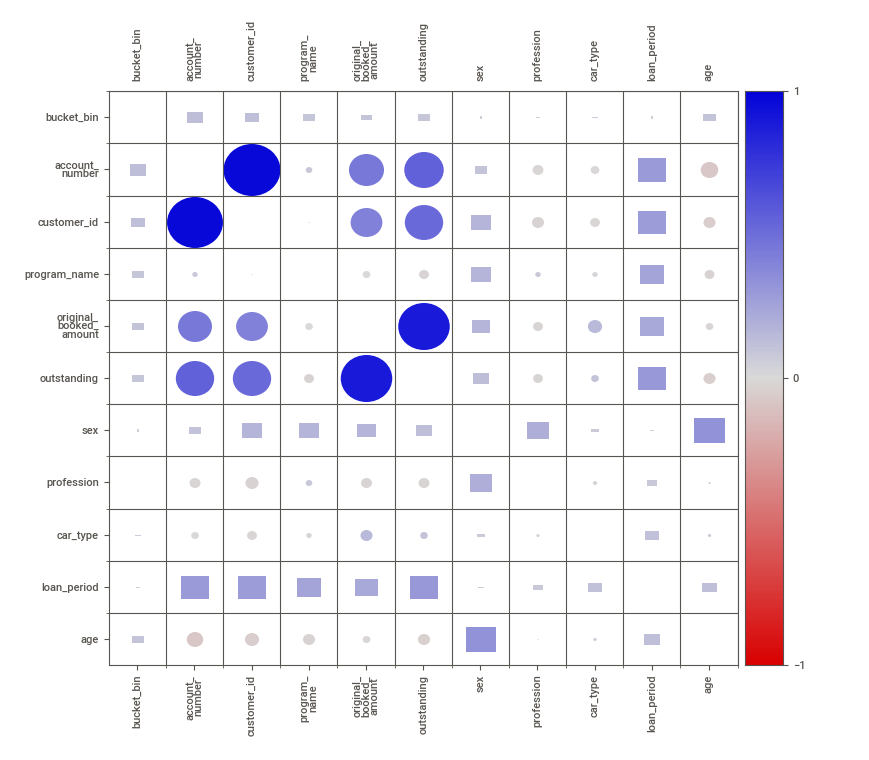
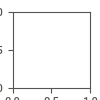

In [ ]:
report01.show_notebook(  w='100%', 
                h=None, 
                scale=None,
                layout='vertical',
                filepath=None)

In [ ]:
# Displays the correlation between every possible pair of attributes as a dataframe
mycor = df_full.corr()  

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

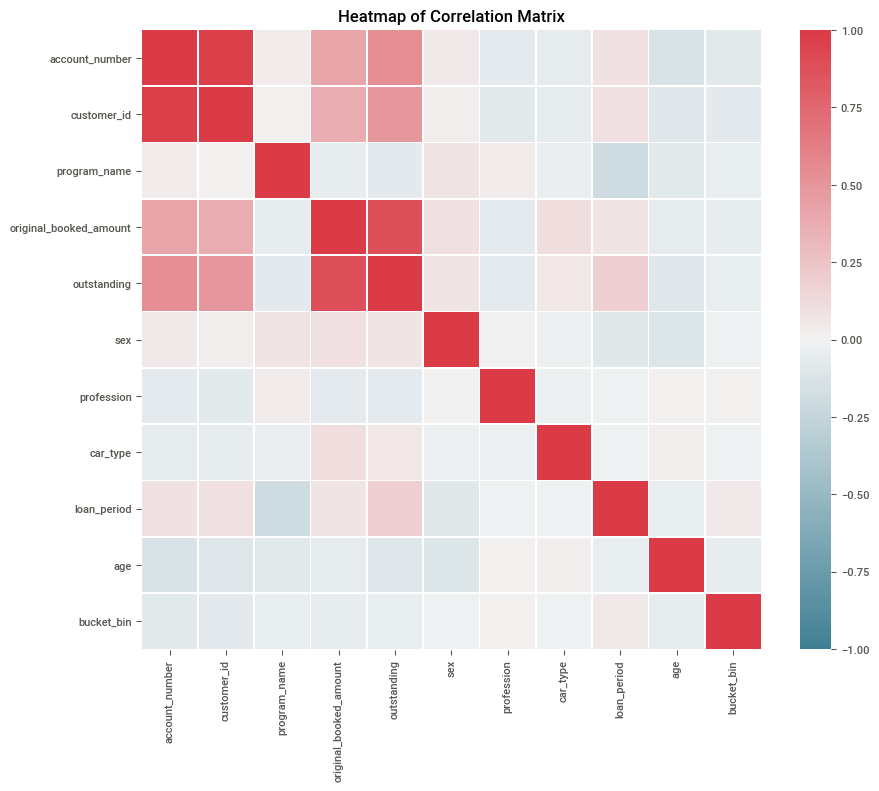

In [ ]:
# Generate our corelation plot or heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220,10,as_cmap = True)

sns.heatmap(mycor,xticklabels=mycor.columns.values,
           yticklabels=mycor.columns.values,cmap=cmap,vmax=1,vmin= -1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

# ANALYSIS OF FULL MODEL 

In [ ]:
#To simplified this part, I use your provided code from example to run Logistic Regression.

def get_specific_columns(df_full, data_types, to_ignore = list(), ignore_target = False):
    columns = df_full.select_dtypes(include=data_types).columns
    if ignore_target:
        columns = filter(lambda x: x not in to_ignore, list(columns))
    return list(columns)

In [ ]:
target = 'bucket_bin'

In [ ]:
all_numeric_variables01 = get_specific_columns(df_full, ["float64", "int64"], [target], ignore_target = True)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
splitter = train_test_split

df_train, df_test = splitter(df_full, test_size = 0.2, random_state = 42)

In [ ]:
X_train01 = df_train[all_numeric_variables01]
y_train01 = df_train[target]

In [ ]:
X_test01 = df_test[all_numeric_variables01]
y_test01 = df_test[target]

In [ ]:
from sklearn.linear_model import LogisticRegression
method = LogisticRegression(random_state=0)
fitted_full_model = method.fit(X_train01, y_train01)
y_pred01 = fitted_full_model.predict(X_test01)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test01, y_pred01))

              precision    recall  f1-score   support

           0       0.83      1.00      0.90    147290
           1       0.00      0.00      0.00     31053

    accuracy                           0.83    178343
   macro avg       0.41      0.50      0.45    178343
weighted avg       0.68      0.83      0.75    178343



In [ ]:
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test01, y_pred01))

Accuracy 0.8258804662924814


# ANALYSIS OF INDIVIDUALS  

In [ ]:
# Check number of missing values records again
df_individuals.isnull().sum()

account_number            0
customer_id               0
program_name              0
original_booked_amount    0
outstanding               0
sex                       0
profession                0
car_type                  0
loan_period               0
age                       5
bucket_bin                0
dtype: int64

In [ ]:
# Remove rows that column age_bin contains NaN
df_individuals.dropna(subset = ['age'], inplace=True)

In [ ]:
df_individuals.shape

(887269, 11)

In [ ]:
df_individuals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887269 entries, 0 to 891713
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   account_number          887269 non-null  int64  
 1   customer_id             887269 non-null  int64  
 2   program_name            887269 non-null  int64  
 3   original_booked_amount  887269 non-null  float64
 4   outstanding             887269 non-null  float64
 5   sex                     887269 non-null  int64  
 6   profession              887269 non-null  int64  
 7   car_type                887269 non-null  int64  
 8   loan_period             887269 non-null  int64  
 9   age                     887269 non-null  float64
 10  bucket_bin              887269 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 81.2 MB


In [ ]:
df_individuals['sex'].value_counts()

1    634415
0    252854
Name: sex, dtype: int64

In [ ]:
def get_specific_columns(df_individuals, data_types, to_ignore = list(), ignore_target = False):
    columns = df_individuals.select_dtypes(include=data_types).columns
    if ignore_target:
        columns = filter(lambda x: x not in to_ignore, list(columns))
    return list(columns)

In [ ]:
target = 'bucket_bin'

In [ ]:
all_numeric_variables02 = get_specific_columns(df_individuals, ["float64", "int64"], [target], ignore_target = True)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
splitter = train_test_split

df_train, df_test = splitter(df_individuals, test_size = 0.2, random_state = 42)

In [ ]:
X_train02 = df_train[all_numeric_variables02]
y_train02 = df_train[target]

In [ ]:
X_test02 = df_test[all_numeric_variables02]
y_test02 = df_test[target]

In [ ]:
from sklearn.linear_model import LogisticRegression
method = LogisticRegression(random_state=0)
fitted_full_model = method.fit(X_train02, y_train02)
y_pred02 = fitted_full_model.predict(X_test02)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test02, y_pred02))

              precision    recall  f1-score   support

           0       0.83      1.00      0.90    146555
           1       0.00      0.00      0.00     30899

    accuracy                           0.83    177454
   macro avg       0.41      0.50      0.45    177454
weighted avg       0.68      0.83      0.75    177454



In [ ]:
print("Accuracy", metrics.accuracy_score(y_test02, y_pred02))

Accuracy 0.8258760016680379


# ANALYSIS OF COMPANIES

In [ ]:
# Check number of missing Values records
df_companies.isnull().sum()

account_number               0
customer_id                  0
program_name                 0
original_booked_amount       0
outstanding                  0
sex                          0
profession                   0
car_type                     0
loan_period                  0
age                       4440
bucket_bin                   0
dtype: int64

In [ ]:
# Because most of these records are companies, we can reove the column age_bin.  
# It makes sense if they don't provide the information of birth_date, sex, and profession.
# Exclude variables that are not relevant or has entirely null values
df_companies.drop(['age', 'sex', 'profession'], axis='columns', inplace=True)

In [ ]:
df_companies.head()

,account_number,customer_id,program_name,original_booked_amount,outstanding,car_type,loan_period,bucket_bin
11,12,12,14,600000.0,587821.39,36,3,0
173,174,174,14,153900.0,153900.00,41,1,0
252,253,174,14,142200.0,136485.21,12,1,0
298,299,298,14,91500.0,15348.06,25,2,0
301,302,12,14,80000.0,76599.33,41,4,0


In [ ]:
df_companies.shape

(4440, 8)

In [ ]:
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4440 entries, 11 to 891326
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_number          4440 non-null   int64  
 1   customer_id             4440 non-null   int64  
 2   program_name            4440 non-null   int64  
 3   original_booked_amount  4440 non-null   float64
 4   outstanding             4440 non-null   float64
 5   car_type                4440 non-null   int64  
 6   loan_period             4440 non-null   int64  
 7   bucket_bin              4440 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 312.2 KB


In [ ]:
df_companies.isnull().sum()

account_number            0
customer_id               0
program_name              0
original_booked_amount    0
outstanding               0
car_type                  0
loan_period               0
bucket_bin                0
dtype: int64

In [ ]:
def get_specific_columns(df_companies, data_types, to_ignore = list(), ignore_target = False):
    columns = df_companies.select_dtypes(include=data_types).columns
    if ignore_target:
        columns = filter(lambda x: x not in to_ignore, list(columns))
    return list(columns)

In [ ]:
target = 'bucket_bin'

In [ ]:
all_numeric_variables03 = get_specific_columns(df_companies, ["float64", "int64"], [target], ignore_target = True)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
splitter = train_test_split

df_train, df_test = splitter(df_companies, test_size = 0.2, random_state = 42)

In [ ]:
X_train03 = df_train[all_numeric_variables03]
y_train03 = df_train[target]

In [ ]:
X_test03 = df_test[all_numeric_variables03]
y_test03 = df_test[target]

In [ ]:
from sklearn.linear_model import LogisticRegression
method = LogisticRegression(random_state=0)
fitted_full_model = method.fit(X_train03, y_train03)
y_pred03 = fitted_full_model.predict(X_test03)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test03, y_pred03))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       774
           1       0.00      0.00      0.00       114

    accuracy                           0.87       888
   macro avg       0.44      0.50      0.47       888
weighted avg       0.76      0.87      0.81       888



In [ ]:
print("Accuracy", metrics.accuracy_score(y_test03, y_pred03))

Accuracy 0.8716216216216216


In [ ]:
result =  pd.DataFrame({'Models': ['Full Model', 'Individuals', 'Companies'], 'Accuracy': [accuracy_score(y_test01, y_pred01),accuracy_score(y_test02, y_pred02), accuracy_score(y_test03, y_pred03)]})
result.head()

,Models,Accuracy
0,Full Model,0.825880
1,Individuals,0.825876
2,Companies,0.871622
